<a href="https://colab.research.google.com/github/SikandarHussain6858/Machine-Learning/blob/main/ML_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ML LAB 5 KNN Algorithm**

Muhammad Sikanar Hussain 502808

Task 1: Loading and Preprocessing Data

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [43]:
iris = load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Select only petal length and petal width
X = data[['petal length (cm)', 'petal width (cm)']]

# Labels
y = iris.target

print("Feature shape:", X.shape)
print("Label shape:", y.shape)

Feature shape: (150, 2)
Label shape: (150,)


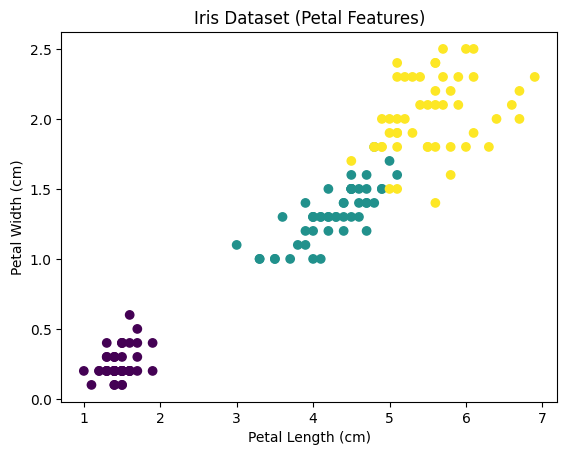

In [45]:
plt.figure()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Dataset (Petal Features)")
plt.show()

Task 2: Implementing KNN Algorithm

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = range(1, 11)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

print("Cross-validation accuracies:", cv_scores)


Cross-validation accuracies: [np.float64(0.9666666666666666), np.float64(0.96), np.float64(0.9533333333333334), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.96), np.float64(0.96), np.float64(0.9666666666666668), np.float64(0.9666666666666668)]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/pytho

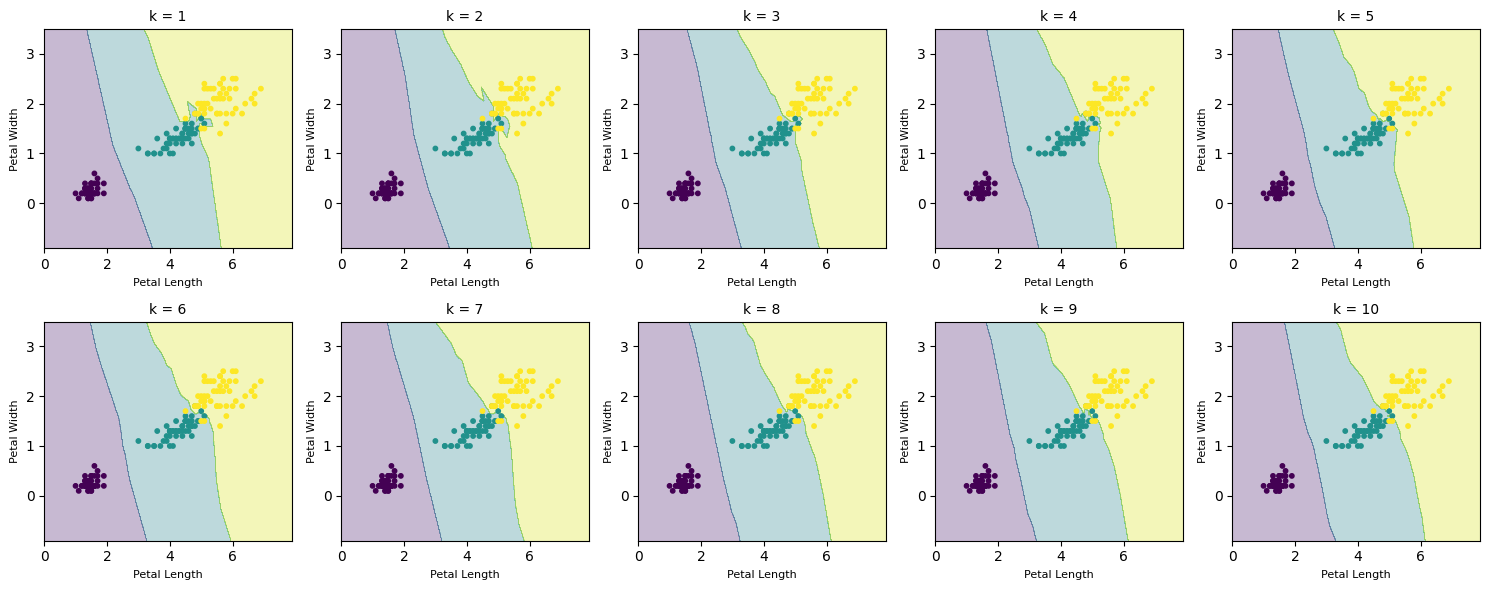

Optimal k based on elbow method: 4


In [59]:
h = 0.01
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Create subplot grid: 2 rows × 5 columns
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # smaller combined figure
axes = axes.ravel()  # flatten for easy looping

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].contourf(xx, yy, Z, alpha=0.3)
    axes[i].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=10)  # smaller points
    axes[i].set_title(f"k = {k}", fontsize=10)
    axes[i].set_xlabel("Petal Length", fontsize=8)
    axes[i].set_ylabel("Petal Width", fontsize=8)

plt.tight_layout()
plt.show()


# Optimal k output (separate, clean)
optimal_k = k_values[np.argmin(errors)]
print("Optimal k based on elbow method:", optimal_k)


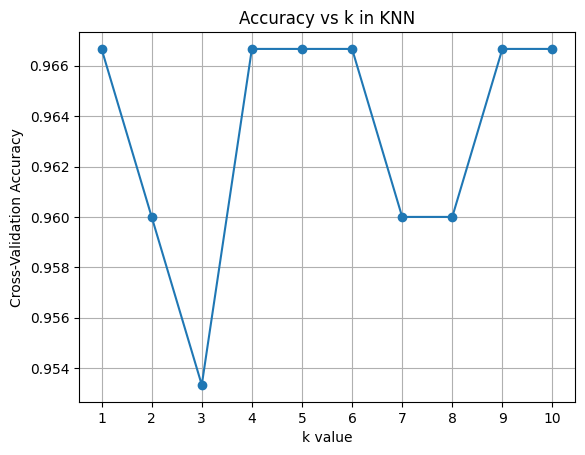

In [51]:
plt.figure()
plt.plot(list(k_values), cv_scores, marker="o")
plt.xlabel("k value")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Accuracy vs k in KNN")
plt.xticks(list(k_values))
plt.grid()
plt.show()

Accuracies for different test sizes: [1.0, 1.0, 1.0, 0.9833333333333333, 0.9866666666666667]


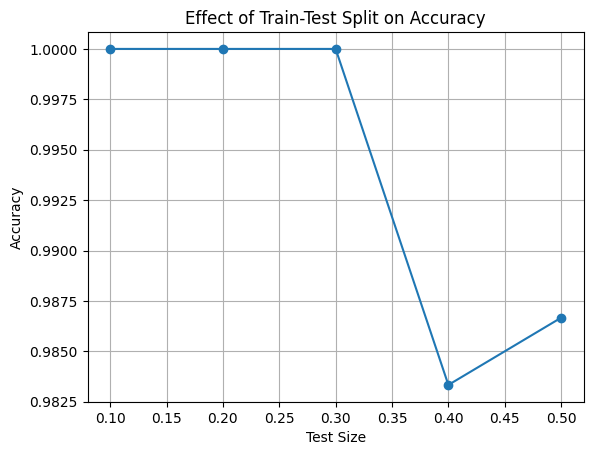

In [52]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
split_accuracies = []

for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=size, random_state=42
    )

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    split_accuracies.append(knn.score(X_test, y_test))

print("Accuracies for different test sizes:", split_accuracies)

plt.figure()
plt.plot(test_sizes, split_accuracies, marker="o")
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.title("Effect of Train-Test Split on Accuracy")
plt.grid()
plt.show()


Task 3: Selecting Optimal Value of K

In [54]:
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    errors.append(1 - scores.mean())   # error = 1 − accuracy


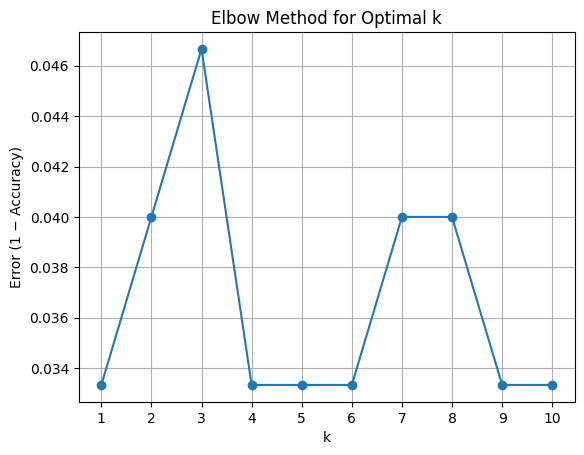

In [55]:
plt.figure()
plt.plot(k_values, errors, marker='o')
plt.xlabel("k")
plt.ylabel("Error (1 − Accuracy)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid()
plt.show()


In [57]:
min_error = min(errors)
optimal_k_values = [k for k, e in zip(k_values, errors) if e == min_error]

print("All optimal k values:", optimal_k_values)


All optimal k values: [4, 5, 6, 9, 10]
